In [1]:
import math

def L(x, y, p=2):

    if len(x) == len(y) and len(x) > 1:

        sum = 0

        for i in range(len(x)):

            sum += math.pow(abs(x[i] - y[i]), p)

        return math.pow(sum, 1 / p)

    else:
        return 0




In [2]:
import numpy as np

x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

for i in range(1, 5):
    d2 = L(x1, x2, p = i)
    d2a = np.linalg.norm(np.array(x1) - np.array(x2), ord=i)
    d3 = L(x1, x3, p=i)
    d3a = np.linalg.norm(np.array(x1) - np.array(x3), ord=i)
    print('L(x1,x2,{})={:.2f}/{:.2f},\tL(x1,x3,{})={:.2f}/{:.2f}'.format(i,d2,d2a,i,d3,d3a))

L(x1,x2,1)=4.00/4.00,	L(x1,x3,1)=6.00/6.00
L(x1,x2,2)=4.00/4.00,	L(x1,x3,2)=4.24/4.24
L(x1,x2,3)=4.00/4.00,	L(x1,x3,3)=3.78/3.78
L(x1,x2,4)=4.00/4.00,	L(x1,x3,4)=3.57/3.57


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

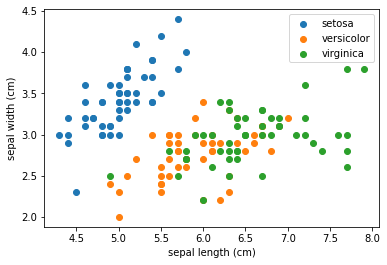

In [4]:
iris = load_iris()
dir(iris)
iris.feature_names
X = iris.data[:,:2]
y = iris.target

plt.scatter(X[y==0,0], X[y==0,1], label=iris.target_names[0])
plt.scatter(X[y==1,0], X[y==1,1], label=iris.target_names[1])
plt.scatter(X[y==2,0], X[y==2,1], label=iris.target_names[2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

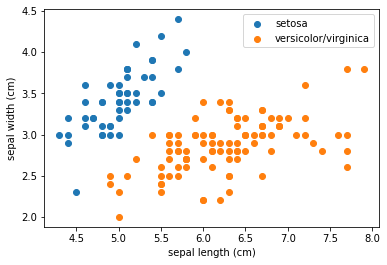

In [5]:
from sklearn.model_selection import  train_test_split
y_true = y.copy()
y_true[y_true==2] = 1

plt.scatter(X[y_true==0,0], X[y_true==0,1], label=iris.target_names[0])
plt.scatter(X[y_true==1,0], X[y_true==1,1], label=iris.target_names[1]+'/'+iris.target_names[2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

In [12]:
from collections import Counter

class KNN:
    def __init__(self, x_train, y_train, n_neigbors=3, p=2):
        self.n = n_neigbors
        self.p = p
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x):

        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.x_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.n, len(self.x_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.x_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])

        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs.items(), key=lambda  x: x[1])[-1][0]
        return max_count

    def score(self, x_test, y_test):
        right_count = 0
        n = 10
        for x, y in zip(x_test, y_test):
            label = self.predict(x)
            if label == y:
                right_count += 1
        return right_count / len(x_test)

In [15]:
clf = KNN(X_train, y_train)
clf.score(X_test, y_test)

0.7333333333333333

In [16]:
test_point = [6,0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))


Test Point: 1


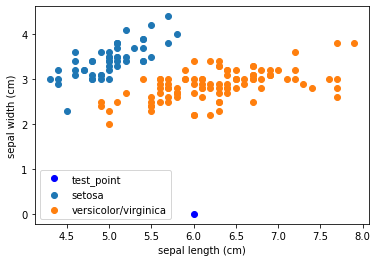

In [17]:
plt.scatter(X[y_true==0,0], X[y_true==0,1], label=iris.target_names[0])
plt.scatter(X[y_true==1,0], X[y_true==1,1], label=iris.target_names[1]+'/'+iris.target_names[2])
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)
clf_sk.score(X_test, y_test)

1.0